 # Modelo de Lorenz
  
  O modelo de Lorenz é um modelo desenvolvido por Edward Lorenz em 1963 para estudar convecção atmosférica. Tal modelo é um sistema de três equações diferenciais ordinárias, mostradas abaixo : 
\begin{aligned}{\frac {\mathrm {d} x}{\mathrm {d} t}}&=\sigma (y-x),\\{\frac {\mathrm {d} y}{\mathrm {d} t}}&=x(\rho -z)-y,\\{\frac {\mathrm {d} z}{\mathrm {d} t}}&=xy-\beta z.\end{aligned}
 
 Neste projeto r é igual a $\rho$ e b é igual a $\beta$. A variável $\sigma$ representa a razão entre a difusividade viscosa e a difusividade termal, também chamada de  [número de Prandtl](Prandtlehttps://en.wikipedia.org/wiki/Prandtl_number); $\rho$ representa o [número de Rayleigh](https://en.wikipedia.org/wiki/Rayleigh_number) e $\beta$ é uma constante relacionada às dimensões físicas.
 
 O modelo tinha como objetivo estudar o movimento de uma camada bidimensional de um fluído o qual é resfriado por cima e e esquentado por baixo. Neste modelo, para $\rho <1$ o sistema tende ao equilíbrio. Para $ 1<\rho < 24.74$ o sistema possui dois pontos de equilíbrio estável, que correspondem a um fluxo de convecção estacionário. O comportamento caótico deve aparecer em torno de $\rho = 24.74$. Neste valor, o sistema exibe um comportamento caótico, onde surge um [Atrator de Lorenz](https://en.wikipedia.org/wiki/Attractor#Strange_attractor), também chamado de atrator estranho, já que o mesmo apresenta uma característica fractal. É curioso notar que o termo "Efeito Borboleta" foi cunhado em comparação à estrutura do atrator de Lorenz, que se aparenta com uma borboleta e/ou o seu bater de asas, como poderá ser notado na simulação abaixo:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as op
from scipy import signal

%matplotlib inline

def deriv(t,xyz,sig,b,r): # função que calcula as derivadas
    x,y,z = xyz
    return [sig*(-x+y),-x*z + r*x - y,x*y - b*z ]

def simula(r,dely,lim):#função que realiza a simulação, os parâmetros dely são a variação no valor inicial de Y
    b = 8/3 # e lim é o valor máximo de t, ou seja, o tempo limite até no qual a simulação é feita.
    sig = 10 #sigma
    dt = 2.5*10**(-3) #intervalo de tempo
    iniciais = [0,1+dely,0] # lista com os parâmetros iniciais
    time = [0]
    integ = ode(deriv)
    integ.set_initial_value(iniciais,0)
    integ.set_f_params(sig,b,r)
    xyz = [iniciais]
    new_t = 0
    
    while integ.successful() and new_t<(lim-dt): # loop de integração
        new_t = integ.t + dt
        time.append(new_t)
        new_xyz = integ.integrate(new_t)
        xyz.append(new_xyz)
        
    xyz= np.array(xyz) # converte a lista para array para indexação
    xs = xyz[:,0]
    ys = xyz[:,1]
    zs = xyz[:,2]
    
    return [xs,ys,zs,time]

def plot(rx,ry,rz,t,r,case): # função que realiza plots 2D para 3 casos

    if case == 0: # caso das trajetórias X(t), Y(t) e Z(t)
        plt.figure(figsize=(8,8))
        plt.subplot(2,1,1)
        a, = plt.plot(t,rx,label = 'r =' + str(r),lw = 2 )
        plt.xlabel('$t$')
        plt.ylabel('$X(t)$')
        plt.grid(linestyle='--')
        plt.legend(handles=[a])

        plt.figure(figsize=(8,8))
        plt.subplot(2,1,2)
        b, = plt.plot(t,ry,label = 'r =' + str(r),lw = 2)
        plt.xlabel('t')
        plt.ylabel('Y(t)')
        plt.grid(linestyle='--')
        plt.legend(handles=[b])

        plt.figure(figsize=(8,8))
        plt.subplot(2,1,2)
        c, = plt.plot(t,rz,label = 'r =' + str(r),lw = 2)
        plt.xlabel('t')
        plt.ylabel('Z(t)')
        plt.grid(linestyle='--')
        plt.legend(handles=[c])
        plt.show()
        
    if case == 1: # caso para o plot da distâncias entre as trajetórias
        # plot apenas da diferença em escala logarítmica para escolha do intervalo de linearização
        plt.figure(figsize=(35,15)) # plot da distância 
        ax = plt.subplot(2,2,1)
        if ry != 0: # caso para comparação entre a linearização e o plot da distância
            t_exp = np.array(t)
            plt.title('$r =$'+'$'+str(r)+'$')
            ax.plot(t[ry],np.exp(rz*t_exp[ry]),label ='$exp{'+str(rz)+'*t}$',color ='black',lw=2)
            ax.plot(t[ry],rx[ry],label ='$\delta R(t)$',lw=2)
        else:
            ax.plot(t,rx,label ='$r = $'+str(r),lw=2)
        ax.set_yscale('log') #plot em escala logarítmica
        ax.legend()
        plt.xlabel('t')
        plt.ylabel('$\delta R(t)$')
        plt.grid(linestyle='--')
        plt.show()
        
    if case == 2: # plot dos diagramas de bifurcação
        
        plt.figure(figsize=(12,12))
        plt.subplot(2,1,1)
        for i in range(0,len(r)): # como para cada r haverá mais de um max loc. precisa-se do número de máx locais
            tam = len(rx[i]) # de rx[i] e o mesmo para os em y e z.
            plt.scatter(r[i]*np.ones(tam),rx[i],color ='black',s=1 )
        plt.xlabel('$r$')
        plt.ylabel('$ X_MaxLocal(r)$')
        plt.grid(linestyle='--')

        plt.figure(figsize=(12,12))
        plt.subplot(2,1,2)
        for i in range(0,len(r)):
            tam = len(ry[i])
            plt.scatter(r[i]*np.ones(tam),ry[i],color ='black',s=1 )
        plt.xlabel('$r$')
        plt.ylabel('$Y_MaxLocal(r)$')
        plt.grid(linestyle='--')

        plt.figure(figsize=(12,12))
        plt.subplot(2,1,2)
        for i in range(0,len(r)):
            tam = len(rz[i])
            plt.scatter(r[i]*np.ones(tam),rz[i],color ='black',s=1 )
        plt.xlabel('$r$')
        plt.ylabel('$Z_MaxLocal(r)$')
        plt.grid(linestyle='--')
        plt.show()
    
def plota3d(rx,ry,rz,r): # plot 3D das trajetórias

        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        plt.title('$r = $'+str(r))
        ax.plot(rx,ry,rz)
        ax.set_xlabel('X(t)') 
        ax.set_ylabel('Y(t)')  
        ax.set_zlabel('Z(t)')     
        plt.show()
        
def dif(rxd,ryd,rzd,rx,ry,rz,t): #função que calcula a diferença entre as trajetórias
    
    difx = rxd - rx # diferença entre as trajetórias em x,y,z com a variação nas condições iniciais e as sem
    dify = ryd - ry
    difz = rzd - rz
    dif = (difx**2 + dify**2 + difz**2)**(1/2) # distância entre as trajetórias 
    
    return dif

def func_exp(x,a,b): # função usada como parâmetro para o curve_fit
    return a*x + b

def lyapunov(dif,intervals,t):
    
    lyapunvals = [] # lista para guardar os resultados do fit
    for i in range(0,len(dif)):
        result = list(op.curve_fit(func_exp,t[intervals[i]],np.log(dif[i][intervals[i]])))
        lyapunvals.append(list(result[0]))
                      
    return lyapunvals

def bifurc(r,t_cort):
    
    mx = [] # listas para guardar os máximos locais de x,y,z
    my = []
    mz = []
    for i in r:
        
        x,y,z,t = simula(i,0,80)
        x = x[t_cort:] # removendo os valores de X,Y,Z antes de 30.
        y = y[t_cort:]
        z = z[t_cort:]
        x = np.array(x) # conversão das listas em arrays para o uso da lista retornada por 
        y = np.array(y) # argrelmax, já que ele retorna as posições dos máx. loc. e não os valores.
        z = np.array(z)
        # anexando os resultados do cálculo dos máximos locais de X,Y,Z nas listas
        mx.append(x[signal.argrelmax(x)[0]])
        my.append(y[signal.argrelmax(y)[0]])
        mz.append(z[signal.argrelmax(z)[0]])
            
    return mx,my,mz

Na linha abaixo foi calculado o resultado da simulação para os valores r:

In [14]:
r = [1,7,15,20,35,50]
rx = [] #listas para guardar os resultados de cada simulação para cada valor de r.
ry = [] 
rz = []
for i in r:
    x,y,z,t = simula(i,0,40)
    rx.append(x)
    ry.append(y)
    rz.append(z)

Plotando as trajetórias em função do tempo e a trajetória no espaço de estado para $r = 1$:

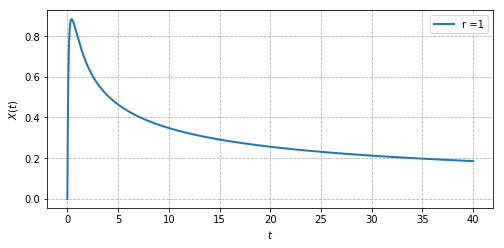

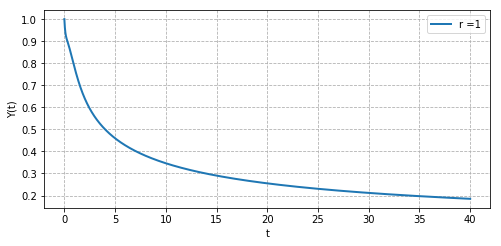

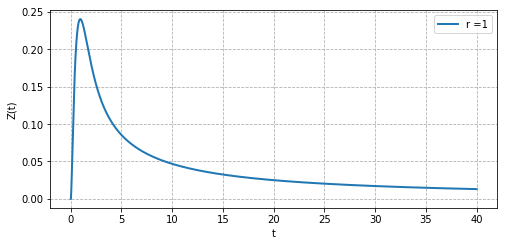

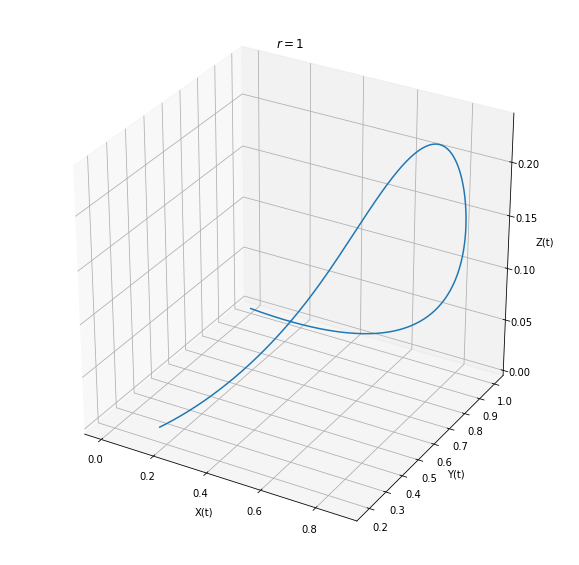

In [15]:
plot(rx[0],ry[0],rz[0],t,1,0)
plota3d(rx[0],ry[0],rz[0],1)

 Nota-se que neste caso, o ponto $(0,0,0)$ é um ponto de equilíbrio estável, já que o sistema tende a ele e nele se mantém; como seria o esperado, já que $r$ é pequeno $[2]$.

Plotando as trajetórias em função do tempo e a trajetória no espaço de estado para $r = 7$:

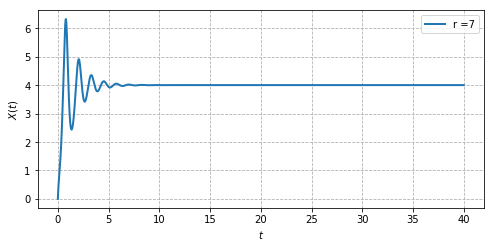

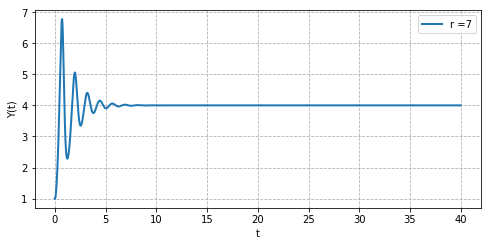

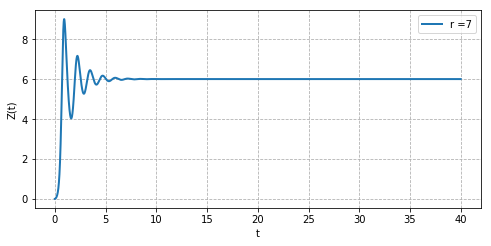

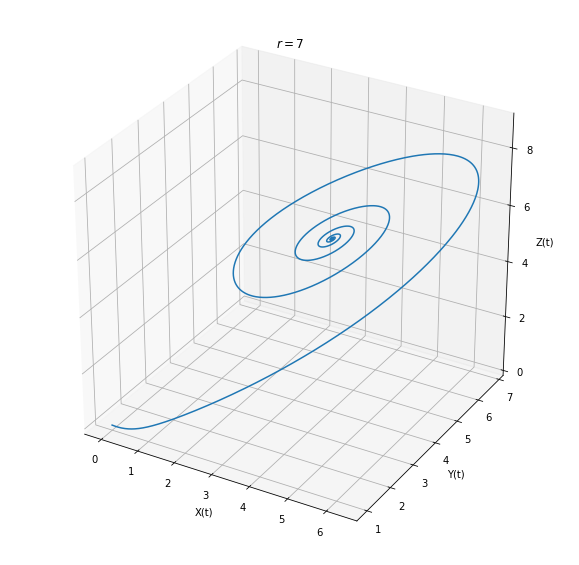

In [16]:
plot(rx[1],ry[1],rz[1],t,7,0)
plota3d(rx[1],ry[1],rz[1],7)

 Neste caso o ponto de atração é aproximadamente o ponto $(4,4,6)$ que é assintóticamente estável. Nota-se que para esse valor de $r$ a origem não é mais um ponto de equilíbrio estável e surgem os rolos de convecção, comentados acima.

Plotando as trajetórias em função do tempo e a trajetória no espaço de estado para $r = 15$:

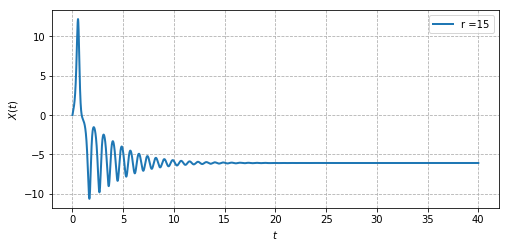

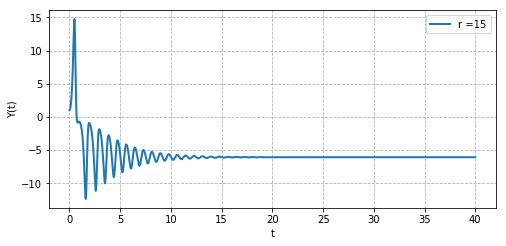

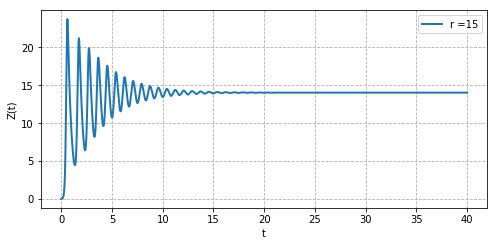

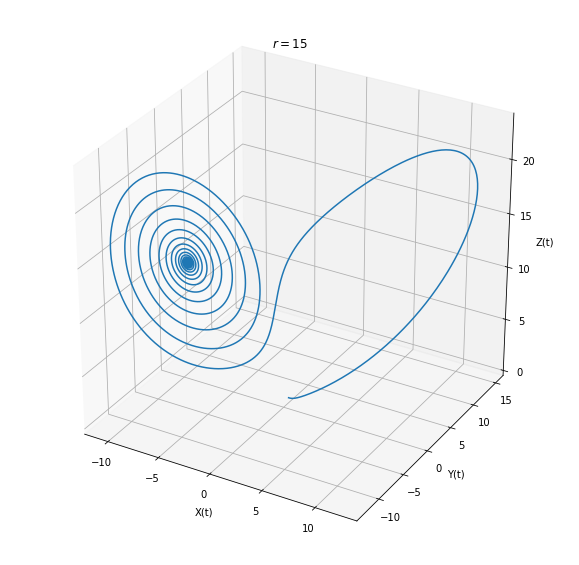

In [392]:
plot(rx[2],ry[2],rz[2],t,15,0)
plota3d(rx[2],ry[2],rz[2],15)

 Neste caso o ponto assintóticamente estável está em torno de $(-5,-5,15)$. Também nota-se o mesmo que foi comentado acima.

Plotando as trajetórias em função do tempo e a trajetória no espaço de estado para $r = 20$:

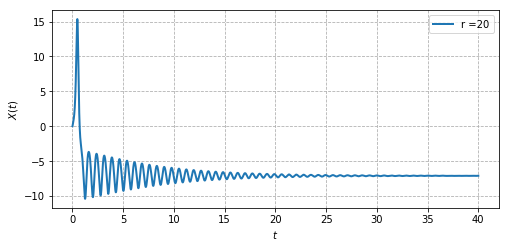

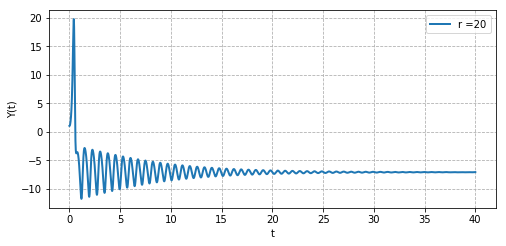

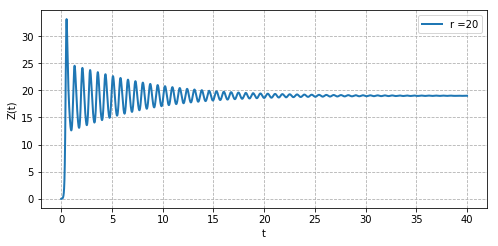

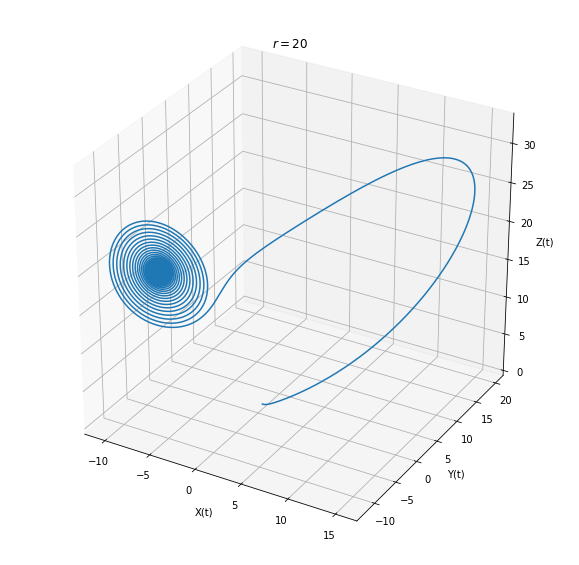

In [393]:
plot(rx[3],ry[3],rz[3],t,20,0)
plota3d(rx[3],ry[3],rz[3],20)

 Para $r = 20$ o ponto assintóticamente estável é algo em torno de (-7,-7,20). Nota-se que o sistema demora mais para tender a esse ponto de equilíbrio, o que pode indicar uma transição para um regime caótico.

Plotando as trajetórias em função do tempo e a trajetória no espaço de estado para $r = 35$:

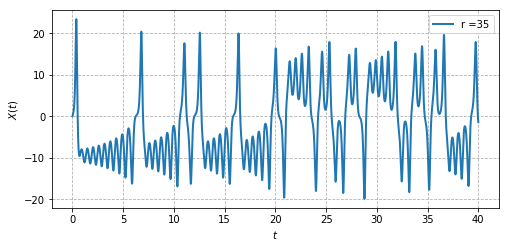

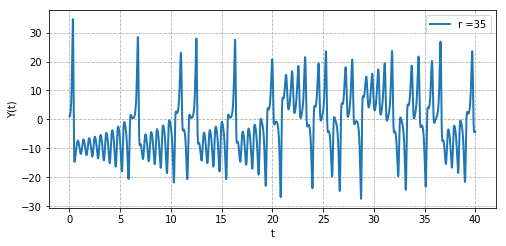

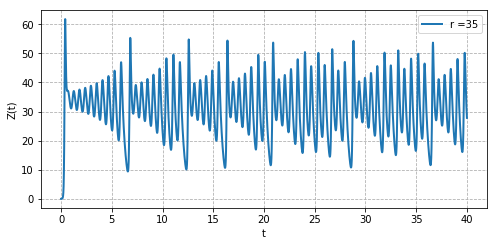

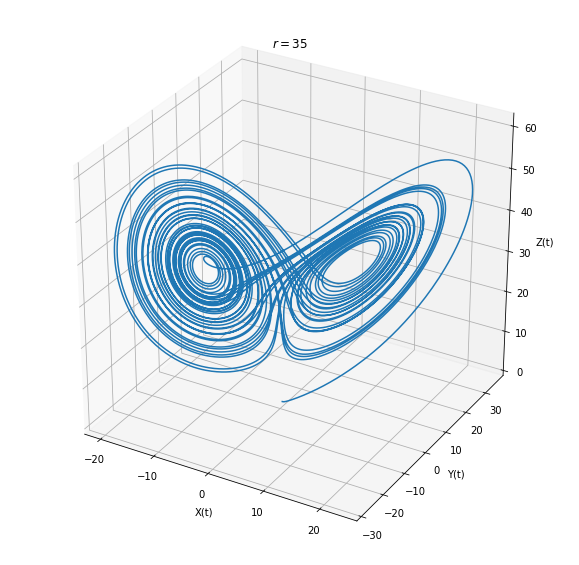

In [394]:
plot(rx[4],ry[4],rz[4],t,35,0)
plota3d(rx[4],ry[4],rz[4],35)

 Este caso já está visívelmente em um regime caótico, já que o mesmo não tende para um ponto de equilíbrio. Nota-se que os valores de $X$ e $Y$ estão mais ou menos limitados entre -20 e 20 para $X$ e entre -40 e 40 para $Y$, isto é explicado pelo fato de que o divergente de $\dot{X}$ é negativo $\textbf{[3]}$, logo o sistema tende a diminuir progressivamente o volume  do sistema ocupado no espaço de estado. Num sistema atmosférico isto representaria a uma convecção turbulenta, na onde ela apresentaria uma estrutura fractal.

Plotando as trajetórias em função do tempo e a trajetória no espaço de estado para $r = 50$:

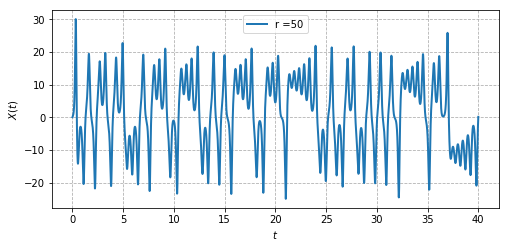

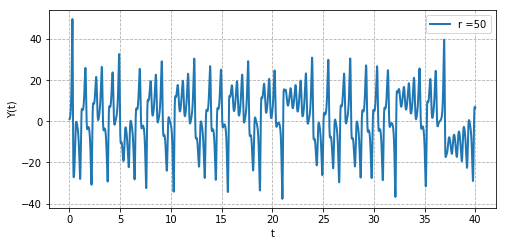

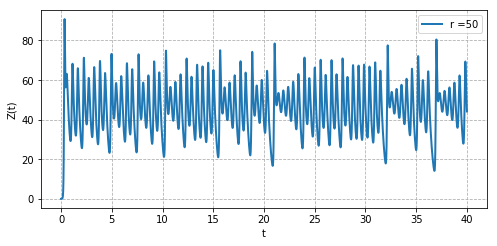

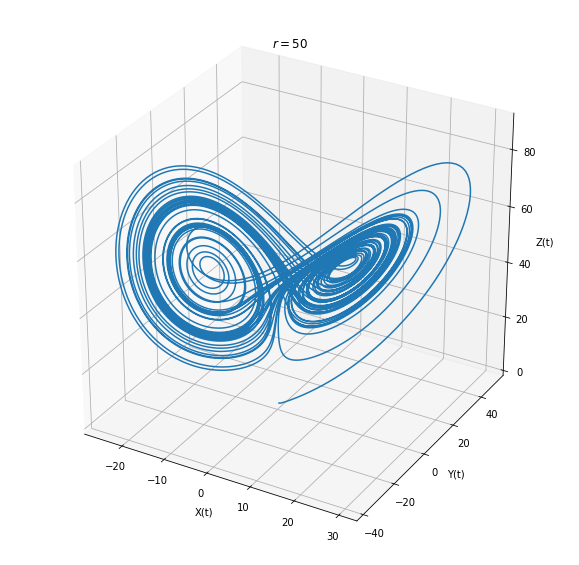

In [395]:
plot(rx[5],ry[5],rz[5],t,50,0)
plota3d(rx[5],ry[5],rz[5],50)

 Outro caso visívelmente caótico, cuja aparência não difere tanto do caso anterior.

Abaixo analisar-se-á a distância entre as trajetórias com a variação infinitesimal em $Y$  e sem, para cada um dos $r$ nos conjunto definido em $(I)$, através do coeficiente de [Lyapunov](https://en.wikipedia.org/wiki/Lyapunov_exponent) :

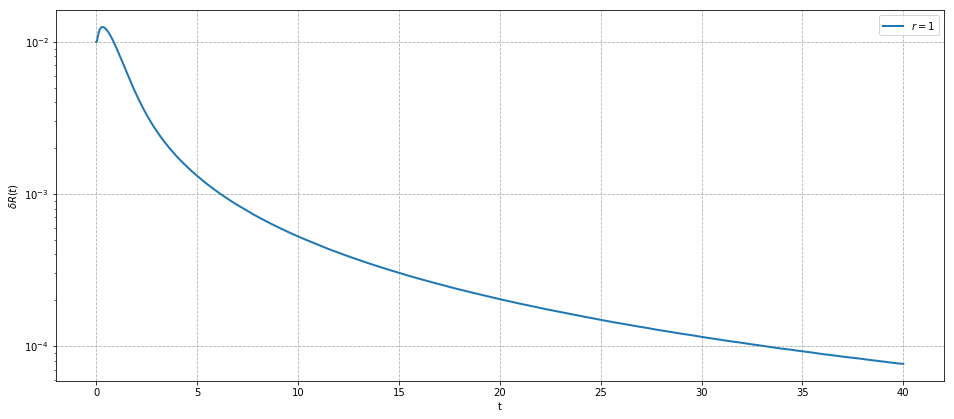

In [17]:
dist = [] #lista que guarda a diferença entre as trajetórias para cada r
intervals = [] #lista que guarda os intervalos em que a diferença é aproximadamente exponencial

# para o primeiro r:
xd,yd,zd,time = simula(r[0],0.01,40)
    
xd = np.array(xd) #conversão das listas para array para indexação
yd = np.array(yd)
zd = np.array(zd)

x = np.array(rx[0])# pegando o resultado já calculado sem a variação de Y
y = np.array(ry[0])
z = np.array(rz[0])

dist.append(dif(xd,yd,zd,x,y,z,time))
plot(dist[0],0,0,time,r[0],1)


Vê-se que no intervalo [1,5] a diferença é aproximadamente exponêncial, logo colocamos o na lista de slices:

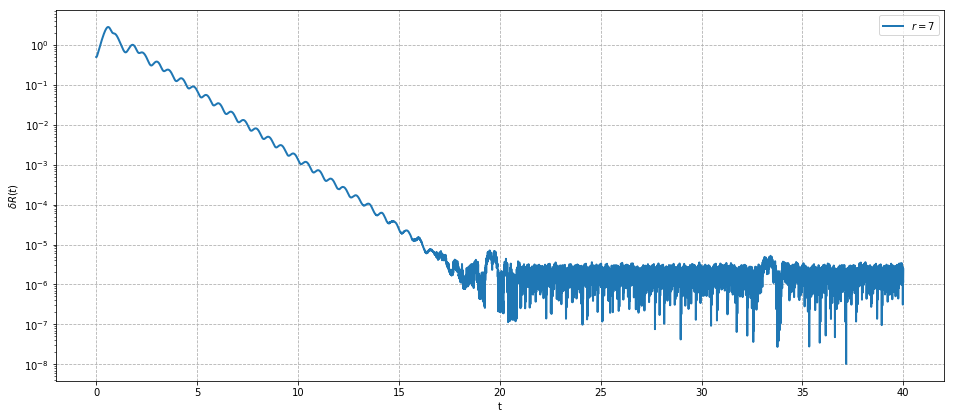

In [18]:
intervals.append(slice(int(1/0.0025),int(5/0.0025)))

# para o segundo r:
xd,yd,zd,time = simula(r[1],0.5,40)
    
xd = np.array(xd) #conversão das listas para array para indexação
yd = np.array(yd)
zd = np.array(zd)

x = np.array(rx[1])# pegando o resultado já calculado sem a variação de Y
y = np.array(ry[1])
z = np.array(rz[1])

dist.append(dif(xd,yd,zd,x,y,z,time))
plot(dist[1],0,0,time,r[1],1)


Vê-se que no intervalo [1,15] a diferença é aproximadamente exponêncial, logo colocamos o na lista de slices:

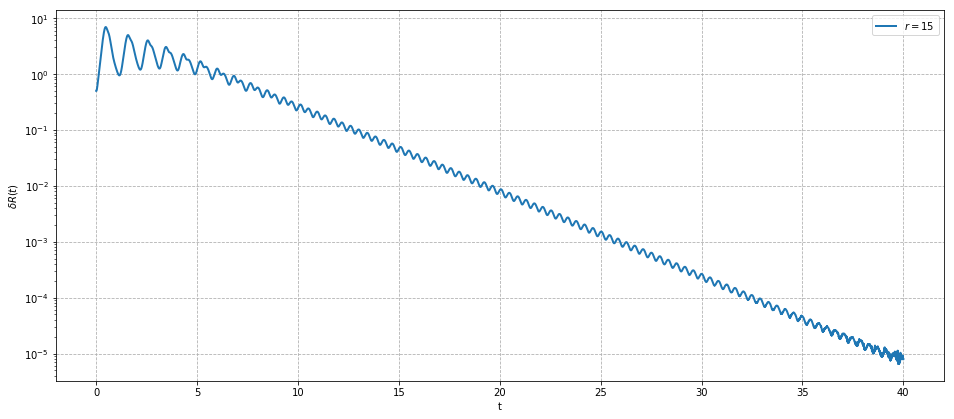

In [19]:

intervals.append(slice(int(1/0.0025),int(16/0.0025)))

# para o terceiro r:
xd,yd,zd,time = simula(r[2],0.5,40)
    
xd = np.array(xd) #conversão das listas para array para indexação
yd = np.array(yd)
zd = np.array(zd)

x = np.array(rx[2])# pegando o resultado já calculado sem a variação de Y
y = np.array(ry[2])
z = np.array(rz[2])

dist.append(dif(xd,yd,zd,x,y,z,time))
plot(dist[2],0,0,time,r[2],1)

Vê-se que no intervalo [5,35] a diferença é aproximadamente exponêncial, logo colocamos-o na lista de slices:

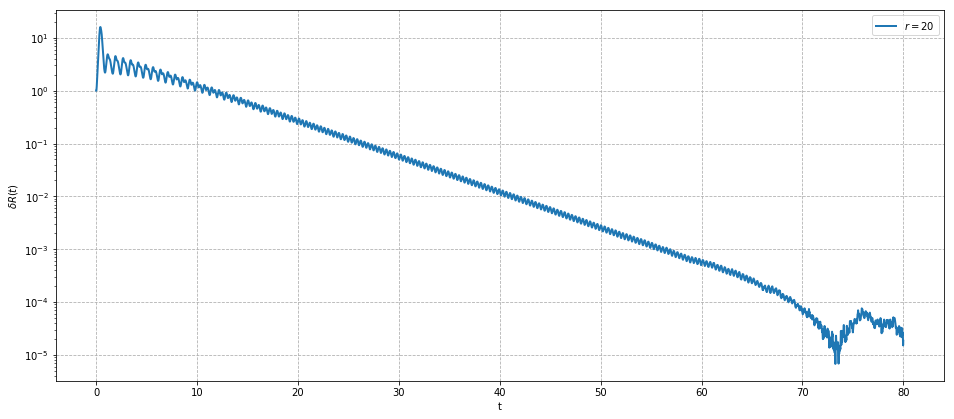

In [20]:
intervals.append(slice(int(5/0.0025),int(36/0.0025)))

# para o quarto r: neste caso se faz necessário simular para um tempo maior
xd,yd,zd,time = simula(r[3],1,80)
x,y,z,time = simula(r[3],0,80)

xd = np.array(xd) #conversão das listas para array para indexação
yd = np.array(yd)
zd = np.array(zd)

x = np.array(x) #conversão das listas para array para indexação
y = np.array(y)
z = np.array(z)

dist.append(dif(xd,yd,zd,x,y,z,time))
plot(dist[3],0,0,time,r[3],1)

Vê-se que no intervalo [10,55] a diferença é aproximadamente exponêncial, logo colocamos-o na lista de slices:

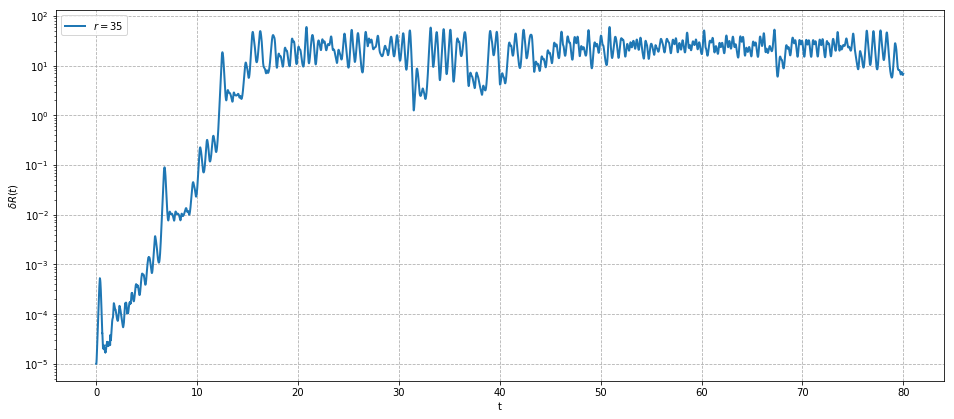

In [21]:
intervals.append(slice(int(10/0.0025),int(56/0.0025)))

# para o quarto r: neste caso se faz necessário simular para um tempo maior
xd,yd,zd,time = simula(r[4],0.00001,80) # valor de dY usado foi o que proporcionou uma "reta" melhor 
x,y,z,time = simula(r[4],0,80) # num intervalo de tempo maior

xd = np.array(xd) #conversão das listas para array para indexação
yd = np.array(yd)
zd = np.array(zd)

x = np.array(x) #conversão das listas para array para indexação
y = np.array(y)
z = np.array(z)

dist.append(dif(xd,yd,zd,x,y,z,time))
plot(dist[4],0,0,time,r[4],1)

Vê-se que no intervalo [0,15] a diferença é aproximadamente exponêncial, logo colocamos-o na lista de slices:

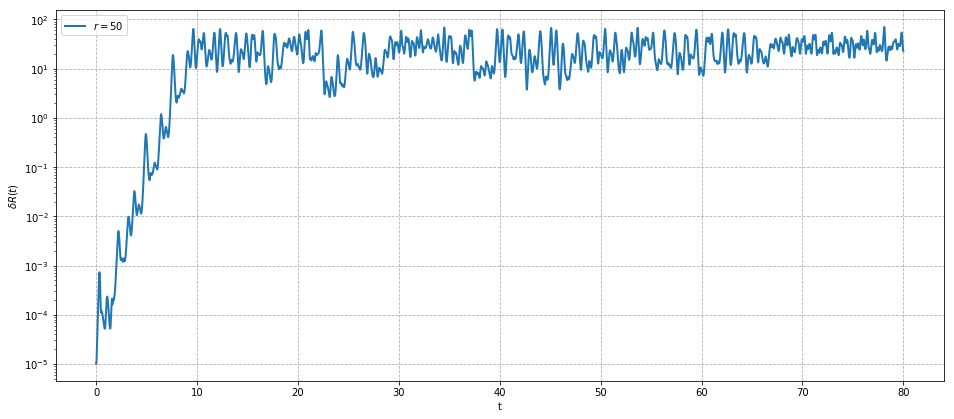

In [22]:
intervals.append(slice(0,int(15/0.0025)))

# para o quarto r: neste caso se faz necessário simular para um tempo maior
xd,yd,zd,time = simula(r[5],0.00001,80) # valor de dY usado foi o que proporcionou uma "reta" melhor 
x,y,z,t = simula(r[5],0,80) # num intervalo de tempo maior

xd = np.array(xd) #conversão das listas para array para realizar as operações
yd = np.array(yd)
zd = np.array(zd)

x = np.array(x) #conversão das listas para array para realizar as operações
y = np.array(y)
z = np.array(z)

dist.append(dif(xd,yd,zd,x,y,z,time))
plot(dist[5],0,0,time,r[5],1)

Vê-se que no intervalo [0,10] a diferença é aproximadamente exponêncial, logo colocamos-o na lista de slices:

In [23]:
intervals.append(slice(0,int(10/0.0025)))

Agora realizar-se-á a linearização da diferença entre as trajetórias para cada r nos intervalos escolhidos:

In [40]:
lyapun_result = lyapunov(dist,intervals,time)
lyapun_result = np.array(lyapun_result)
#abaixo os resultados de cada coeficiente de Lyapunov para valor de r.
print(lyapun_result[:,0])

[-0.47714144 -0.77905249 -0.3497315  -0.15476364  0.87949805  1.38218718]


Abaixo há a comparação entre a linearização e a diferença real para cada valor de r. Como a linearização foi feita tomando-se o logarítmo dos valores (pois pressupus que fosse mais preciso que linearizar usando uma função exponencial) há um deslocamento vertical entre os gráficos, que provavelmente é por causa do fator linear que não foi incluid; já que $ln(e^{a*x}*b + c)\neq ln(e^{a*x}*b) = a*x + ln(b)$.

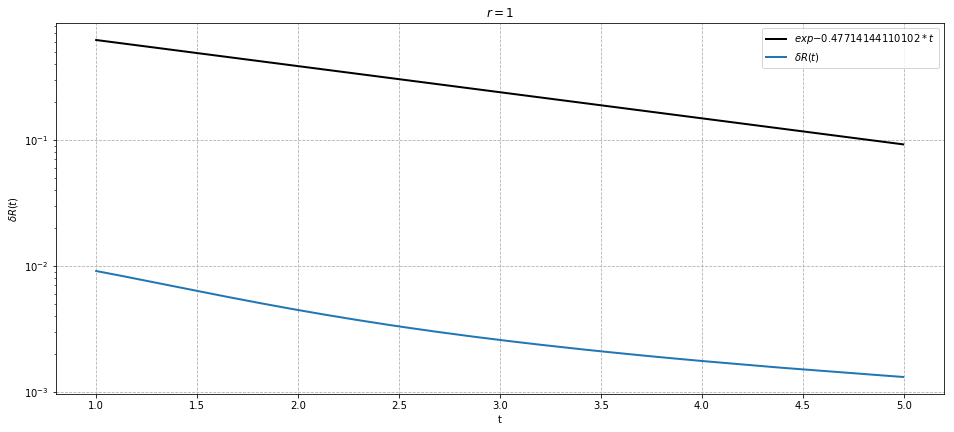

In [404]:
plot(dist[0],intervals[0],lyapun_result[0][0],time,r[0],1)

Neste primeiro caso, há um grande deslocamento entre a linearização e a função diferença. Isto se deve provavelmente ao fato de que a diferença entre as trajetórias nesse caso deve cair muito rapidamente, mas o fator angular aparenta estar bem próximo do esperado.

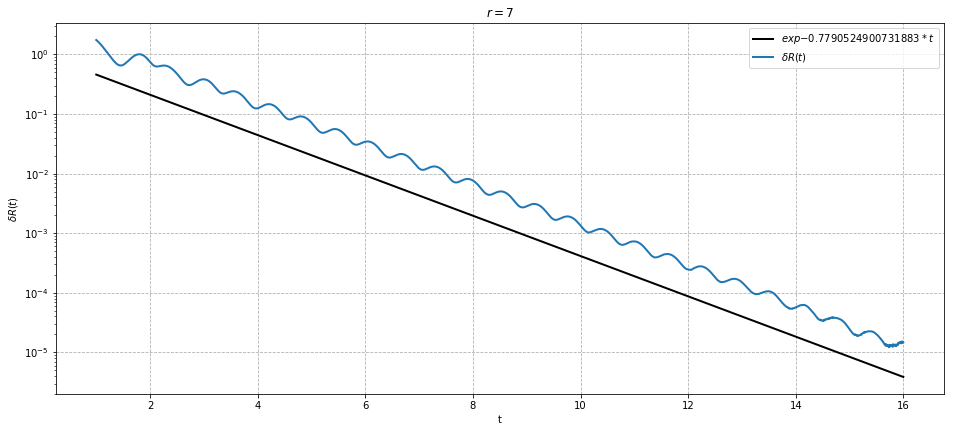

In [405]:
plot(dist[1],intervals[1],lyapun_result[1][0],time,r[1],1)

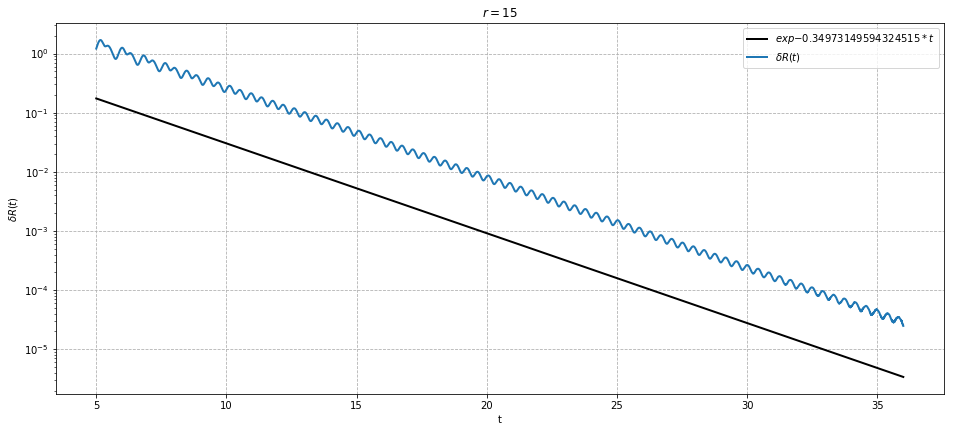

In [406]:
plot(dist[2],intervals[2],lyapun_result[2][0],time,r[2],1)

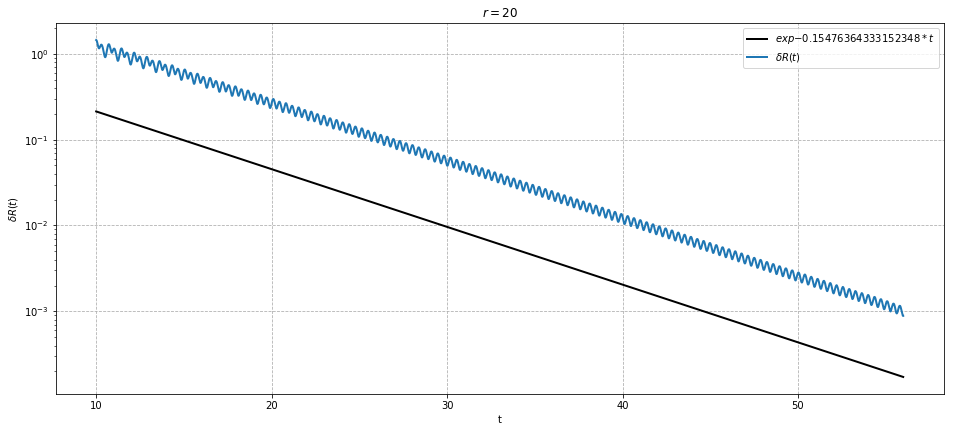

In [408]:
plot(dist[3],intervals[3],lyapun_result[3][0],time,r[3],1)

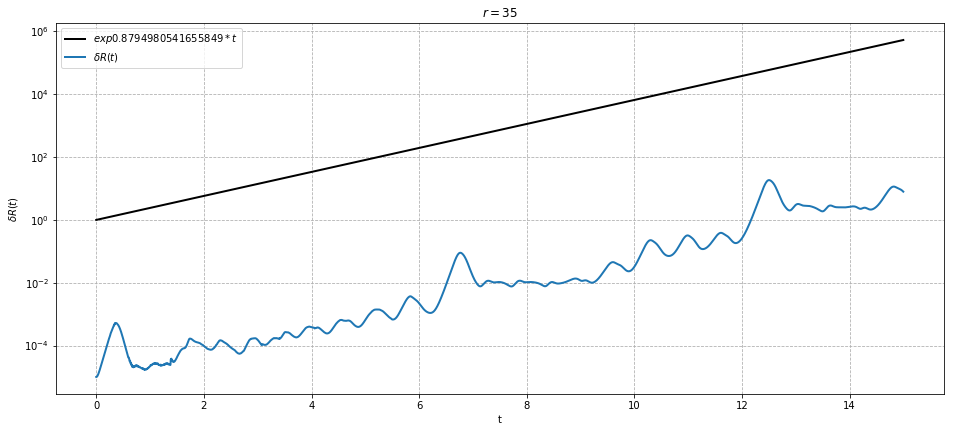

In [409]:
plot(dist[4],intervals[4],lyapun_result[4][0],time,r[4],1)

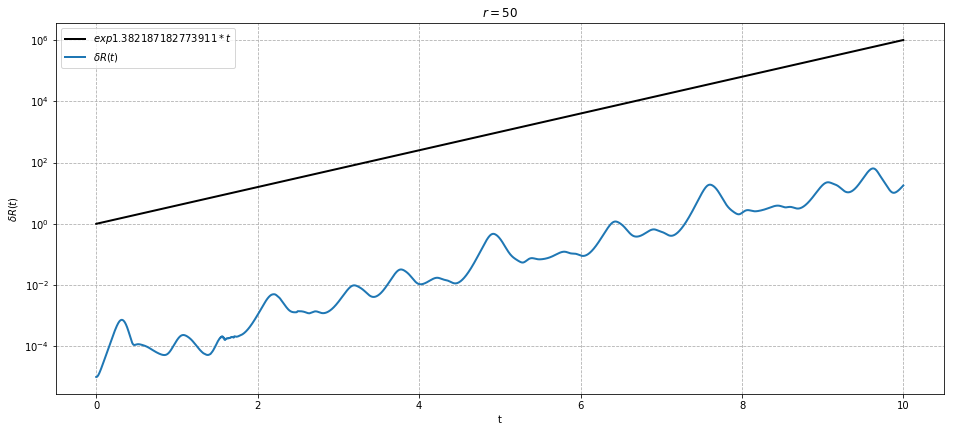

In [410]:
plot(dist[5],intervals[5],lyapun_result[5][0],time,r[5],1)

 Agora analisar-se-á os diagramas de bifurcação para $X$,$Y$,$Z$, para um intervalo de valores de r entre 0 e 200. 

In [494]:
r = np.arange(0,201)
t_cort = int(30/0.0025) # o tempo de corte é 30, cujo índice da lista de tempo será 30 sobre delta t.
mx,my,mz = bifurc(r,t_cort)

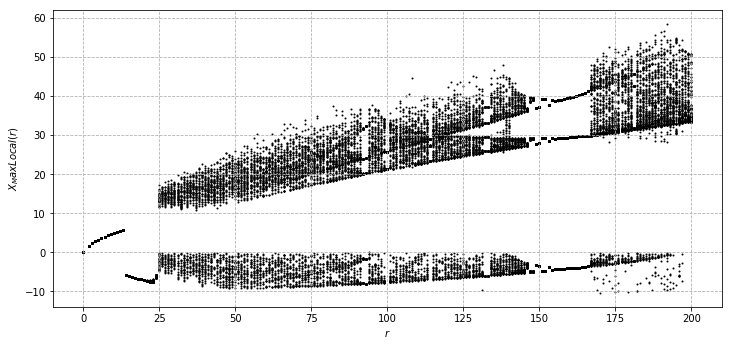

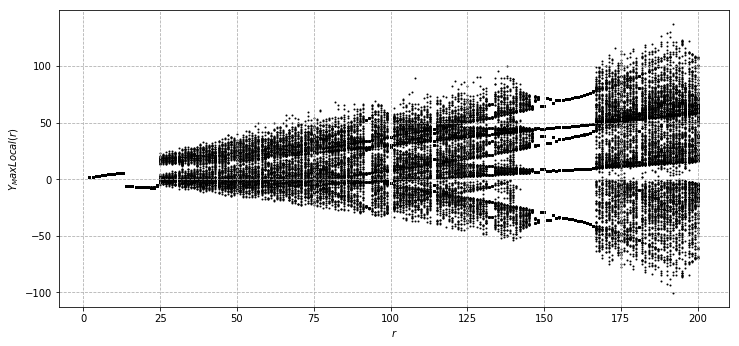

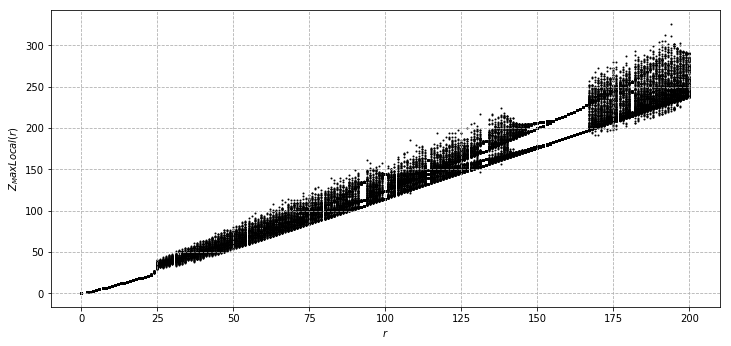

In [495]:
plot(mx,my,mz,0,r,2)

 Nota-se que o onde ocorre a primeira duplicação do período é em torno de $r = 25$, o que era esperado, como foi mencionado acima. Como o fenômeno de duplicação do período é característico de sistemas caóticos, percebe-se que após esse valor o sistema entra numa região de caoticidade. Entre os valores de $r = 150$ e $r = 165$ existe uma região em que ocorre uma órbita estável de período duplo, como pode ser visto abaixo:

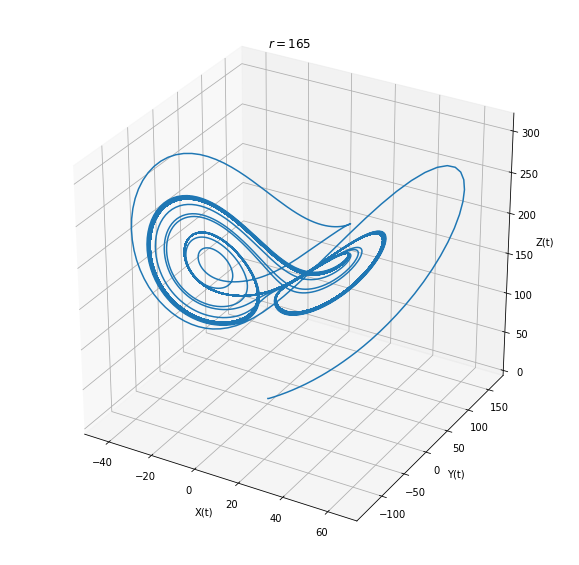

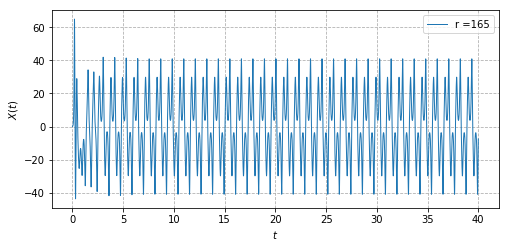

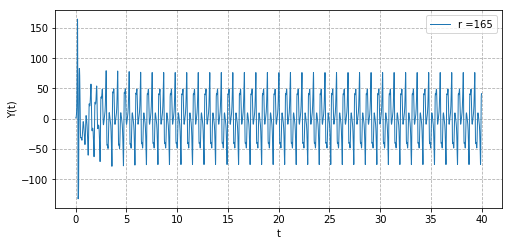

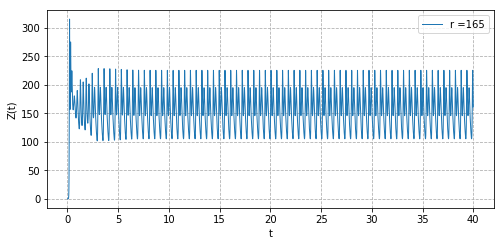

In [7]:
j,k,l,p = simula(165,0,40)
plota3d(j,k,l,165)
plot(j,k,l,p,165,0)

 Para $r = 400$ existe uma órbita estável, porém com um período muito pequeno:

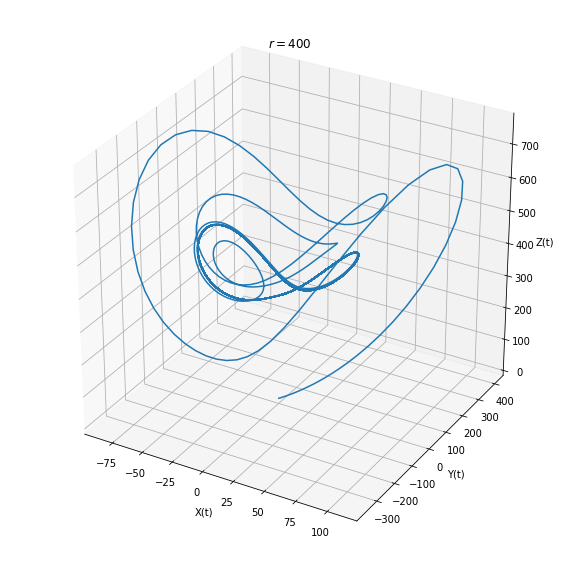

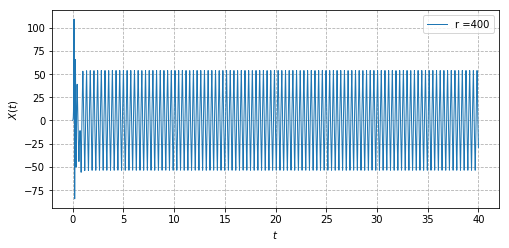

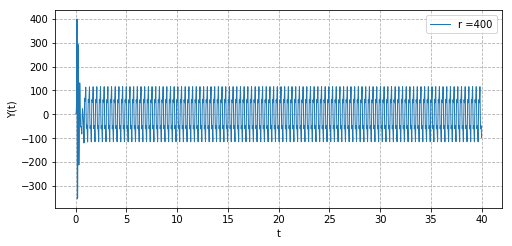

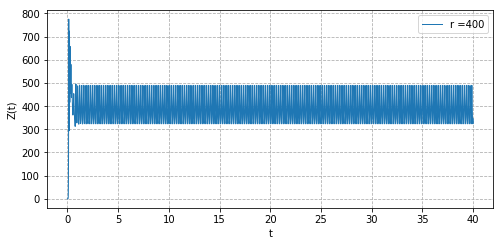

In [6]:
j,k,l,p = simula(400,0,40)
plota3d(j,k,l,400)
plot(j,k,l,p,400,0)

 # Conclusão: 
 
 Os valores dos coeficientes de Lyapunov obtidos variam entre -1 e 1, aproximadamente, que vão aumentando quando os valores de $r$ aumentam; para o primeiro valor de $r$ o resultado não é satisfatório pois o decaimento é muito rápido, provavelmente com uma maior precisão obteria-se um resultado melhor.
 
 De acordo com os resultados do plot dos gráficos de bifurcação, pode-se concluir que a região de caoticidade começa a partir de $r = 25$ aproximadamente e que existe uma região entre $r = 160$ e $r = 170$ em que há uma órbita estável de período duplo.

 # Referências
 
[1] http://web.math.ucsb.edu/~jhateley/paper/lorenz.pdf

[2] https://en.wikipedia.org/wiki/Lorenz_system

[3] Tom W.B. Kibble, Frank H. Berkshire: Classical Mechanics 5th Edition; pg.331